### Log File Analysis

This code adds to that in log_analysis.py, doing further analysis and visualisation to help uncover some of the trends in activity.

#### Importing & Loading the log file

In [26]:
import log_analysis # make sure this is in the same directory
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
path = 'sample-log.log' # make this the log file name
log = log_analysis.LogFileAnalysis(path)

In [3]:
log_df = log.log_df
print("info:")
display(log_df.info())
print()
print("first few lines of log file:")
display(log_df.head())

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432096 entries, 0 to 432095
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   IP           432096 non-null  object        
 1   Country      432096 non-null  object        
 2   Datetime     432096 non-null  datetime64[ns]
 3   Request      432096 non-null  object        
 4   Code         432096 non-null  object        
 5   User Agent   432096 non-null  object        
 6   Object Size  432096 non-null  int32         
 7   Date         432096 non-null  object        
 8   Year         432096 non-null  int32         
 9   Month        432096 non-null  int32         
 10  Day          432096 non-null  int32         
 11  Hour         432096 non-null  int32         
 12  Minute       432096 non-null  int32         
 13  Date Hour    432096 non-null  object        
 14  Code Class   432096 non-null  object        
 15  Req Code     432096 non-null

None


first few lines of log file:


,IP,Country,Datetime,Request,Code,User Agent,Object Size,Date,Year,Month,Day,Hour,Minute,Date Hour,Code Class,Req Code,Page,Page Main
0,100.34.17.233,NO,2025-07-01 06:00:02,GET /news/grammy-nominations-2024 HTTP/1.1,302,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,269,2025-07-01,2025,7,1,6,0,2025-07-01:06,3,GET,/news/grammy-nominations-2024,news
1,173.80.18.254,NO,2025-07-01 06:00:04,POST / HTTP/1.1,200,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,124,2025-07-01,2025,7,1,6,0,2025-07-01:06,2,POST,/,
2,10.3.0.48,SE,2025-07-01 06:00:06,GET /podcasts/behind-the-beat HTTP/1.1,200,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,284,2025-07-01,2025,7,1,6,0,2025-07-01:06,2,GET,/podcasts/behind-the-beat,podcasts
3,172.56.143.33,US,2025-07-01 06:00:08,GET /terms-of-service HTTP/1.1,200,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,262,2025-07-01,2025,7,1,6,0,2025-07-01:06,2,GET,/terms-of-service,terms-of-service
4,208.54.157.184,NO,2025-07-01 06:00:09,POST /privacy-policy HTTP/1.1,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,118,2025-07-01,2025,7,1,6,0,2025-07-01:06,2,POST,/privacy-policy,privacy-policy


#### Initial Report

seen when running log_analysis.py:

In [4]:
log.print_full_report()

SUMMARY OF LOG FILE:
total number of logs submitted: 432096

first log: 2025-07-01 06:00:02
last log: 2025-07-04 22:59:59

no. unique IP addresses: 40887

no. unique country codes: 14

no. valid requests (2xx): 354706

IP ADDRESSES:
top 25 IP addresses found (number of requests made):
IP
45.133.1.2         5400
45.133.1.1         5400
35.185.0.156       3600
194.168.1.2        1859
194.168.1.6        1855
194.168.1.8        1831
194.168.1.3        1798
194.168.1.1        1789
194.168.1.7        1767
194.168.1.4        1763
194.168.1.5        1738
185.220.101.86     1440
185.220.100.77     1440
185.220.101.19     1440
185.220.102.135    1440
185.220.101.78     1440
172.25.2.223         47
192.168.45.153       46
192.168.21.180       42
172.27.2.90          42
192.168.26.218       42
192.168.3.22         41
192.168.43.58        41
172.20.3.37          40
192.168.5.26         40

IP addresses with a suspicious number of requests (over 100 per day on average):
IP
45.133.1.2         5400
45

#### Further Analysis

##### Suspicious IP Adresses

In [10]:
suspicious_IPs = log.ip_alarming.index
log_df_suspicious = log_df[log_df['IP'].isin(suspicious_IPs)]
log_df_not_suspicious = log_df[~log_df['IP'].isin(suspicious_IPs)]
print(len(log_df_suspicious))
print(len(log_df_not_suspicious))

36000
396096


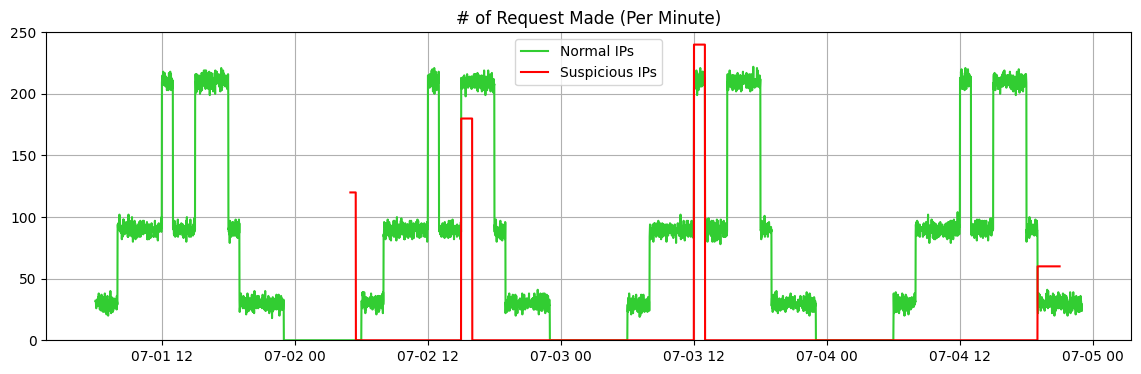

In [42]:
# when were they making their requests

suspicious_req_count = log_df_suspicious.groupby(pd.Grouper(key='Datetime', axis=0, freq='min'))['IP'].count()
not_suspicious_req_count = log_df_not_suspicious.groupby(pd.Grouper(key='Datetime', axis=0, freq='min'))['IP'].count()

plt.figure(figsize=(14, 4))
plt.plot(not_suspicious_req_count.index, not_suspicious_req_count, label='Normal IPs', c='limegreen')
plt.plot(suspicious_req_count.index, suspicious_req_count, label='Suspicious IPs', c='r')
plt.title("# of Request Made (Per Minute)")
plt.legend()
plt.ylim((0, 250))
plt.grid(visible=True)
plt.show()

In [47]:
# what specific pages did they request

print("suspicious requests:")
display(log_df_suspicious['Page'].value_counts().head(10))

print("not suspicious requests:")
display(log_df_not_suspicious['Page'].value_counts().head(10))

suspicious requests:


Page
/search                                     1743
/privacy-policy                              563
/about                                       542
/contact                                     540
/articles/the-evolution-of-jazz              540
/interviews/studio-sessions-with-legends     534
/podcasts/music-producer-interviews          530
/reviews/album-review-midnight-echoes        529
/terms-of-service                            523
/articles/indie-rock-revival-2024            521
Name: count, dtype: int64

not suspicious requests:


Page
/episodes/ep-42-synthesizer-history    15359
/contact                               15299
/about                                 15187
/api/podcasts                          15175
/artists/emerging-indie-artists        15166
/podcasts/music-producer-interviews    15155
/articles/indie-rock-revival-2024      15135
/podcasts/behind-the-beat              15116
/                                      15111
/privacy-policy                        15103
Name: count, dtype: int64

In [48]:
# what parts of the site generally did they request

print("suspicious requests:")
display(log_df_suspicious['Page Main'].value_counts(normalize=True).head(10))

print("not suspicious requests:")
display(log_df_not_suspicious['Page Main'].value_counts(normalize=True).head(10))

suspicious requests:


Page Main
api               0.425000
search            0.048417
articles          0.029472
podcasts          0.029167
auth              0.025000
admin             0.025000
privacy-policy    0.015639
about             0.015056
contact           0.015000
interviews        0.014833
Name: proportion, dtype: float64

not suspicious requests:


Page Main
api         0.150994
podcasts    0.076423
articles    0.075903
images      0.075396
static      0.075159
episodes    0.038776
contact     0.038624
about       0.038342
artists     0.038289
            0.038150
Name: proportion, dtype: float64

In [52]:
# what were the request codes, lots of invalid ??
# 200 means a valid request

suspicious_req_codes = log_df_suspicious['Req Code'].value_counts(normalize=True)
not_suspicious_req_codes = log_df_not_suspicious['Req Code'].value_counts(normalize=True)

suspicious_req_classes = log_df_suspicious['Code Class'].value_counts(normalize=True)
not_suspicious_req_classes = log_df_not_suspicious['Code Class'].value_counts(normalize=True)

print("suspicious IP http requests:")
display(suspicious_req_codes)
print("\nnotsuspicious IP http requests:")
display(not_suspicious_req_codes)

print("\n\nsuspicious IP response codes:")
display(suspicious_req_classes)
print("\nnot suspicious IP response codes:")
display(not_suspicious_req_classes)

# list most common request codes
# highlight errors

suspicious IP http requests:


Req Code
GET        0.541917
POST       0.244194
PATCH      0.044500
DELETE     0.043333
HEAD       0.043333
PUT        0.041639
OPTIONS    0.041083
Name: proportion, dtype: float64


notsuspicious IP http requests:


Req Code
GET       0.854316
POST      0.116795
PUT       0.019455
DELETE    0.009435
Name: proportion, dtype: float64



suspicious IP response codes:


Code Class
4    0.460778
2    0.418167
5    0.121056
Name: proportion, dtype: float64


not suspicious IP response codes:


Code Class
2    0.857499
4    0.076333
3    0.056666
5    0.009503
Name: proportion, dtype: float64

C:\Users\poppy\AppData\Local\Temp\ipykernel_18068\1654801763.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


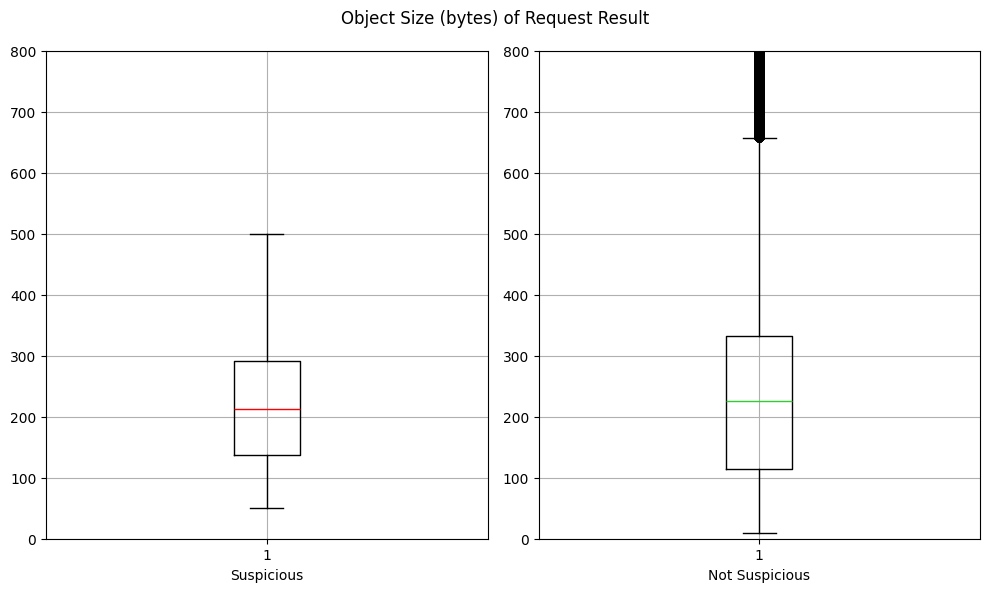

In [68]:
# object size
suspicious_object_size = log_df_suspicious['Object Size']
not_suspicious_object_size = log_df_not_suspicious['Object Size']

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].boxplot(suspicious_object_size, label='Suspicious', medianprops={'color':'r'})
ax[0].grid()
ax[0].set_ylim((0, 800))
ax[0].set_xlabel('Suspicious')

ax[1].boxplot(not_suspicious_object_size, label='Not Suspicious', medianprops={'color':'limegreen'})
ax[1].grid()
ax[1].set_ylim((0, 800))
ax[1].set_xlabel('Not Suspicious')
fig.suptitle("Object Size (bytes) of Request Result")

fig.tight_layout()
fig.show()

In [75]:
# what user agents were they using

suspicious_agents = log_df_suspicious['User Agent']
not_suspicious_agents = log_df_not_suspicious['User Agent']

suspicious_agents_counts = suspicious_agents.value_counts()
not_suspicious_agents_counts = not_suspicious_agents.value_counts()

print("suspicious user agents:")
display(suspicious_agents_counts)
print("\nnot suspicious user agents:")
display(not_suspicious_agents_counts)

suspicious user agents:


User Agent
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36                              5421
Wget/1.20.3 (linux-gnu)                                                                                                                      3600
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Version/17.2.1 Safari/537.36                          3538
curl/7.68.0                                                                                                                                  2173
HTTPie/3.2.0                                                                                                                                 2075
python-requests/2.28.1                                                                                                                       2069
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36 E


not suspicious user agents:


User Agent
Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:121.0) Gecko/20100101 Firefox/121.0                                                             39852
Mozilla/5.0 (Android 14; Mobile; rv:121.0) Gecko/121.0 Firefox/121.0                                                                         39817
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36                                        39816
Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.2 Mobile/15E148 Safari/604.1    39718
Mozilla/5.0 (Linux; Android 14; SM-G998B) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Mobile Safari/537.36                       39670
Mozilla/5.0 (iPad; CPU OS 17_2_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.2 Mobile/15E148 Safari/604.1             39654
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/53

##### Suspicious User Agents

In [77]:
suspicious_user_agent_names = set(suspicious_agents_counts.index) - set(not_suspicious_agents_counts.index)
print("user agents found to be suspicious:")
for ua in list(suspicious_user_agent_names): print(ua)

user agents found to be suspicious:
HTTPie/3.2.0
nikto/2.1.6
python-requests/2.28.1
Apache-HttpClient/4.5.13
Burp Suite Professional
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36
curl/7.68.0
sqlmap/1.6.12
PostmanRuntime/7.32.3
OWASP ZAP
Mozilla/5.0 (compatible; Nmap Scripting Engine)
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36
Postman/1.0
okhttp/4.9.3
Wget/1.20.3 (linux-gnu)


In [78]:
# what locations were they used from
log_df_user_agent_suspicious = log_df[log_df['User Agent'].isin(list(suspicious_user_agent_names))]
log_df_user_agent_not_suspicious = log_df[~log_df['User Agent'].isin(list(suspicious_user_agent_names))]

print("suspicious locations:")
sus_locations = log_df_user_agent_suspicious['Country'].value_counts(normalize=True)
display(sus_locations)

print("not suspicious locations:")
not_sus_locations = log_df_user_agent_not_suspicious['Country'].value_counts(normalize=True)
display(not_sus_locations)

suspicious locations:


Country
RU    0.584676
US    0.166667
CN    0.083750
KP    0.082778
IR    0.082130
Name: proportion, dtype: float64

not suspicious locations:


Country
UK    0.132072
SE    0.096810
NL    0.096768
DE    0.096539
CA    0.096515
FR    0.096505
US    0.096408
AU    0.096230
NO    0.096135
DK    0.096018
Name: proportion, dtype: float64

#### Conclusions:

**IP Addresses:** There were a handful of IP addresses that made a large number of requests, in huge bursts at regular intervals, indicating suspicious activity. These IPs could be blocked in the future.

**Dates & Times:** There are daily patterns to when people visit the site which can be anticipated. The suspicious requests however do appear to come at specific points, leading to the huge surges in requests.

**Pages:** Suspicious IPs tended to target the API a lot more than non-suspicious ones, as well as the search part of the website. There was also one specific podcast episode page that was visited a huge number of times by human users - this must have been a huge driver to the site. 

**HTTP Requests & Responses:** The majority of requests to the site were successful (response codes starting with 2), however the suspicious IPs' requests mostly resulted in errors, and had made requests outside of the usual 'GET', 'POST', 'PUT', which also indicates suspicious behaviour. 

**Location:** The country with the most requests is the UK, to be expected, however a significant number of the suspicious requests seemed to come from Russia.